## 1.파일 다운로드

In [ ]:
!git clone https://github.com/Soyoung-Yoon/data_01

Cloning into 'data_01'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 53 (delta 19), reused 53 (delta 19), pack-reused 0
Unpacking objects: 100% (53/53), 5.48 MiB | 8.84 MiB/s, done.


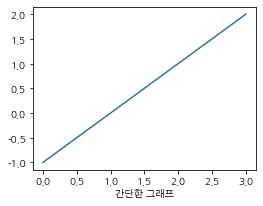

In [1]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
plt.figure(figsize=(4,3))
plt.plot([-1, 0, 1, 2])
plt.xlabel('간단한 그래프')
plt.show()

## Youtube 인기 채널은?

- title	: 채널명
- category : 카테고리
- subscriber : 구독자수
- view : 조회수
- video : 영상개수

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('data_01/youtube_rank.xlsx', engine='openpyxl')
print(type(df))
# 원본을 복사
original = df.copy()

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# youtube_rank.csv 파일을 DataFrame으로 읽어 temp라는 이름을 붙입니다
temp = pd.read_csv('data_01/youtube_rank.csv')
print(type(temp))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# df 확인
df.head(5)

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],5140만,128억5130만,319개
1,Big Hit Labels,[음악/댄스/가수],4550만,120억8966만,433개
2,BANGTANTV,[음악/댄스/가수],3870만,54억7598만,"1,319개"
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
4,SMTOWN,[음악/댄스/가수],2450만,180억7532만,"3,583개"


In [ ]:
df.tail(3)

,title,category,subscriber,view,video
997,OCN,[TV/방송],40만,3억4583만,"10,071개"
998,Bravo jamoasi,[미분류],40만,6193만,25개
999,덕출 : DCTVGO,[TV/방송],40만,8249만,202개


In [ ]:
# df의 row의 개수 및 각 column의 정보 및 메모리 사용량을 확인
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1000 non-null   object
 1   category    1000 non-null   object
 2   subscriber  1000 non-null   object
 3   view        1000 non-null   object
 4   video       1000 non-null   object
dtypes: object(5)
memory usage: 455.4 KB


In [ ]:
# df의 행, 열의 수를 확인
df.shape

(1000, 5)

DataFrame의 구성요소
- DataFrame.index : 행 index
- DataFrame.columns : 열 index
- DataFrame.values : 2차원 데이터

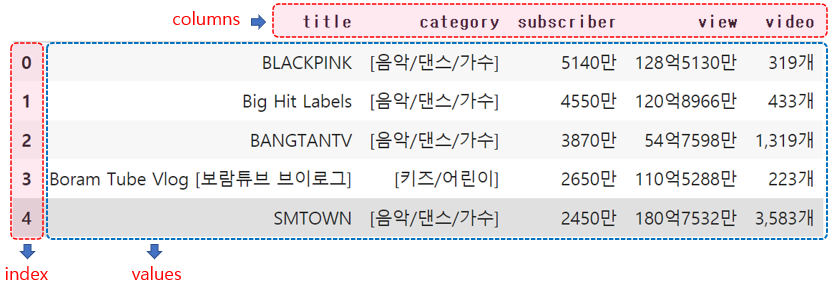

In [ ]:
df.columns.values  # array

array(['title', 'category', 'subscriber', 'view', 'video'], dtype=object)

DataFrame의 한 개의 column은 Series이다.
- DataFrame[컬럼명] : Series
- DataFrame[[컬럼명1, 컬럼명2, ...]] : DataFrame

In [ ]:
# [1-8] 데이터프레임의 'video' 컬럼의 내용 중 첫 5개 행을 출력합니다.
# dtype : 'object' -> 문자열
s = df['video']
print(s.head(5))

0      319개
1      433개
2    1,319개
3      223개
4    3,583개
Name: video, dtype: object


In [ ]:
temp = df[['title','video']]
print(temp.head(3))

            title   video
0       BLACKPINK    319개
1  Big Hit Labels    433개
2       BANGTANTV  1,319개


In [ ]:
# [1-9] Series의 index 구성요소 확인
s.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
# [1-10] Series의 values 구성요소 확인
# 1차원 numpy array (ndarray)
s.values[:10]

array(['319개', '433개', '1,319개', '223개', '3,583개', '2,205개', '13,291개',
       '1,181개', '112개', '2,417개'], dtype=object)

In [ ]:
# [1-11] 컬럼의 이름을 ['채널', '카테고리', '구독자', '조회', '영상']으로 변경합니다.
# 변경 후 상위 2개 행을 출력해 봅니다.
df.columns = ['채널', '카테고리', '구독자', '조회', '영상']
df.head(2)

,채널,카테고리,구독자,조회,영상
0,BLACKPINK,[음악/댄스/가수],5140만,128억5130만,319개
1,Big Hit Labels,[음악/댄스/가수],4550만,120억8966만,433개


In [ ]:
df[]   # indexing을 사용하여 value를 변경한다.

### 데이터 타입 변경

In [ ]:
# [1-12] 원본(original)을 복사하여 df 이름을 부여합니다.
df = original.copy()

In [ ]:
# [1-13] df의 내용 중 첫 5개 행을 출력합니다.
df.head(5)

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],5140만,128억5130만,319개
1,Big Hit Labels,[음악/댄스/가수],4550만,120억8966만,433개
2,BANGTANTV,[음악/댄스/가수],3870만,54억7598만,"1,319개"
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
4,SMTOWN,[음악/댄스/가수],2450만,180억7532만,"3,583개"


데이터의 dtype을 확인하는 방법
- DataFrame.info() : dtype 뿐 아니라 Non Null, Memory의 정보까지 표시됨
- DataFrame.dtypes : 각 columns 별 dtype 확인
- Series.dtype : Series의 dtype 확인

In [ ]:
# [1-14] df의 각 column 별 dtype을 확인합니다.
print(df.dtypes)

title         object
category      object
subscriber    object
view          object
video         object
dtype: object


In [ ]:
# [1-15] df의 'subscriber' 컬럼의 데이터타입(dtype)을 확인해 봅니다.
print(df['subscriber'].dtype)

object


In [ ]:
# [1-16] df의 'subscriber'의 첫 3개 행을 출력해 내용을 확인합니다.
df['subscriber'].head(3)

0    5140만
1    4550만
2    3870만
Name: subscriber, dtype: object

In [ ]:
# df의 'subscriber' 컬럼에 대해 '만'을 '0000'으로 변경
df['subscriber'].replace('만', '0000', regex=True).head(5)

0    51400000
1    45500000
2    38700000
3    26500000
4    24500000
Name: subscriber, dtype: object

In [ ]:
df['subscriber'].head(3)

0    5140만
1    4550만
2    3870만
Name: subscriber, dtype: object

In [2]:
import numpy as np


In [ ]:
# 형변환, 전처리
df['subscriber'] = df['subscriber'].replace('만', '0000', regex=True).astype('int64')
df['view'] = df['view'].replace({'억':'', '만':'0000'}, regex=True).astype('int64')
df['video'] = df['video'].replace(['개', ','], '', regex=True).astype('int32')
df['category'] = df['category'].str[1:-1].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   title       1000 non-null   object  
 1   category    1000 non-null   category
 2   subscriber  1000 non-null   int64   
 3   view        1000 non-null   int64   
 4   video       1000 non-null   int32   
dtypes: category(1), int32(1), int64(2), object(1)
memory usage: 29.2+ KB


In [ ]:
# [1-30] 'youtube_v1.xlsx' 엑셀 파일로 저장하기
df.to_excel('youtube_v1.xlsx', index=False)

In [ ]:
temp = pd.read_excel('youtube_v1.xlsx', engine='openpyxl')
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1000 non-null   object
 1   category    1000 non-null   object
 2   subscriber  1000 non-null   int64 
 3   view        1000 non-null   int64 
 4   video       1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
import pandas as pd
import numpy as np
temp = pd.DataFrame({'날짜_일반': ['2021/01/01', '2021/01/02', '2021/01/03', '2021/01/04', '2021/01/05'],
                     '날짜_시간': ['2021-01-01 1:12:10', '2021-01-02 1:13:45', '2021-01-03 2:50:10', '2021-01-04 3:12:30', '2021-01-05 5:40:20'],
                     '날짜_특수': ['21-01-01', '21-01-02', '21-01-03', '21-01-04', '21-01-05'],
                     '범주': ['금', '토', '일', '월', '화']})
temp

,날짜_일반,날짜_시간,날짜_특수,범주
0,2021/01/01,2021-01-01 1:12:10,21-01-01,금
1,2021/01/02,2021-01-02 1:13:45,21-01-02,토
2,2021/01/03,2021-01-03 2:50:10,21-01-03,일
3,2021/01/04,2021-01-04 3:12:30,21-01-04,월
4,2021/01/05,2021-01-05 5:40:20,21-01-05,화


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜_일반   5 non-null      object
 1   날짜_시간   5 non-null      object
 2   날짜_특수   5 non-null      object
 3   범주      5 non-null      object
dtypes: object(4)
memory usage: 288.0+ bytes


In [ ]:
import numpy as np
# Series.astype(np.datetime64) 을 사용하여 '날짜_일반'의 dtype을 변경해 보자
s1 = temp['날짜_일반'].astype(np.datetime64)
s1

0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
Name: 날짜_일반, dtype: datetime64[ns]

In [ ]:
# Series.astype(np.datetime64) 을 사용하여 '날짜_시간'의 dtype을 변경해 보자
s2 = temp['날짜_시간'].astype(np.datetime64)
s2

0   2021-01-01 01:12:10
1   2021-01-02 01:13:45
2   2021-01-03 02:50:10
3   2021-01-04 03:12:30
4   2021-01-05 05:40:20
Name: 날짜_시간, dtype: datetime64[ns]

In [ ]:
# Series.astype(np.datetime64)을 사용하여 '날짜_특수'의 dtype을 변경해 보자
s3 = temp['날짜_특수'].astype(np.datetime64)
s3

0   2001-01-21
1   2002-01-21
2   2003-01-21
3   2004-01-21
4   2005-01-21
Name: 날짜_특수, dtype: datetime64[ns]

In [ ]:
# pd.to_datetime(Series, format='형식')을 사용하여 '날짜_특수'의 dtype을 변경
s4 = pd.to_datetime(temp['날짜_특수'], format='%y-%m-%d')
s4

0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
Name: 날짜_특수, dtype: datetime64[ns]

In [ ]:
# Series.astype('category')를 사용하여 '범주'의 dtype을 변경해 보자
s5 = temp['범주'].astype('category')
s5

0    금
1    토
2    일
3    월
4    화
Name: 범주, dtype: category
Categories (5, object): ['금', '월', '일', '토', '화']

In [ ]:
# 위에서 만들어진 '범주'를 정렬해 보자 (Series.sort_values() 사용)
s5.sort_values()

0    금
3    월
2    일
1    토
4    화
Name: 범주, dtype: category
Categories (5, object): ['금', '월', '일', '토', '화']

In [ ]:
# pd.Categorical(Series, categories=카테고리목록, ordered=True)를 사용해 요일 순 범주를 만들어 보자
# 요일목록 => ['월', '화', '수', '목', '금', '토', '일']
s6 = pd.Categorical(temp['범주'], categories=['월', '화', '수', '목', '금', '토', '일'], ordered=True)
s6

['금', '토', '일', '월', '화']
Categories (7, object): ['월' < '화' < '수' < '목' < '금' < '토' < '일']

In [ ]:
temp['범주'] = s6
temp['범주']

0    금
1    토
2    일
3    월
4    화
Name: 범주, dtype: category
Categories (7, object): ['월' < '화' < '수' < '목' < '금' < '토' < '일']

In [ ]:
# 위에서 만들어진 '범주'를 정렬해 보자 (Series.sort_values() 사용)
temp['범주'].sort_values()

3    월
4    화
0    금
1    토
2    일
Name: 범주, dtype: category
Categories (7, object): ['월' < '화' < '수' < '목' < '금' < '토' < '일']

### 인기 채널 확인하기


In [ ]:
# 'subscriber' 가 가장 많은 5개의 채널
df.sort_values('subscriber', ascending=False).head()

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433
2,BANGTANTV,음악/댄스/가수,38700000,5475980000,1319
3,Boram Tube Vlog [보람튜브 브이로그],키즈/어린이,26500000,11052880000,223
4,SMTOWN,음악/댄스/가수,24500000,18075320000,3583


In [ ]:
# 'view'가 가장 많은 5개 채널
df.sort_values('view', ascending=False).head()

,title,category,subscriber,view,video
4,SMTOWN,음악/댄스/가수,24500000,18075320000,3583
6,1theK (원더케이),음악/댄스/가수,20900000,17860420000,13291
8,ArianaGrandeVevo,음악/댄스/가수,18200000,14796920000,112
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433


In [ ]:
# 'video'가 가장 많은 5개 채널
df.sort_values('video', ascending=False).head()

,title,category,subscriber,view,video
169,YTN news,뉴스/정치/사회,1970000,3801710000,492791
60,SBS Drama,TV/방송,4360000,4260860000,339029
737,연합뉴스TV,뉴스/정치/사회,550000,697650000,311370
57,SBS Entertainment,TV/방송,4490000,4516190000,210810
17,CNN,뉴스/정치/사회,10900000,7899750000,149530


In [ ]:
# 'video'가 가장 적은 5개 채널
df.sort_values('video', ascending=True).head()

,title,category,subscriber,view,video
194,OfficialGDRAGON,음악/댄스/가수,1750000,0,0
128,tzuyang쯔양,음식/요리/레시피,2570000,2570000,1
964,fx,음악/댄스/가수,410000,380000,3
454,CL,음악/댄스/가수,840000,52470000,5
742,Trouble Maker (Official YouTube Channel),음악/댄스/가수,540000,173840000,9


In [ ]:
# 'category'로 오름차순, 'subscriber'로 내림차순 정렬
df.sort_values(['category', 'subscriber'], ascending=[True, False])

,title,category,subscriber,view,video
979,상해기SangHyuk,BJ/인물/연예인,410000,80040000,182
952,박민정 TV,BJ/인물/연예인,420000,103310000,348
925,따규햅번,BJ/인물/연예인,430000,197600000,2052
890,카페노예 jun,BJ/인물/연예인,450000,25450000,43
830,채채ChaeChae,BJ/인물/연예인,470000,124750000,338
...,...,...,...,...,...
44,Serie A,해외,5490000,1745030000,19354
722,KB국민카드,회사/오피셜,560000,187960000,443
709,미스&미스터트롯 공식계정,회사/오피셜,570000,202340000,659
108,Billboard,회사/오피셜,2900000,1010800000,6100


In [ ]:
# 'category'가 '음악/댄스/가수'인 채널의 subscriber TOP5
df[df['category']=='음악/댄스/가수'].sort_values('subscriber', ascending=False).head()

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433
2,BANGTANTV,음악/댄스/가수,38700000,5475980000,1319
4,SMTOWN,음악/댄스/가수,24500000,18075320000,3583
5,1MILLION Dance Studio,음악/댄스/가수,22300000,5753580000,2205


In [ ]:
# 'category'가 'TV/방송'인 채널의 view TOP5
df.loc[df['category'] == 'TV/방송', :].sort_values('view', ascending=False).head()

,title,category,subscriber,view,video
12,KBS World,TV/방송,14300000,10158060000,46830
22,MBCkpop,TV/방송,8670000,6339380000,38695
76,KBS Entertain,TV/방송,3930000,5340910000,91783
57,SBS Entertainment,TV/방송,4490000,4516190000,210810
77,MBCdrama,TV/방송,3920000,4350540000,51543


In [ ]:
# 'subscriber'가 30000000 (3천만) 이상인 채널
df[df['subscriber'] >= 30000000]

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433
2,BANGTANTV,음악/댄스/가수,38700000,5475980000,1319


In [ ]:
# [1-40] 'subscriber'가 30000000 (3천만)이상 이거나,
#        'video' 개수가 50000 이상인 채널을 알아봅니다.
df.loc[(df['subscriber'] >= 30000000) | (df['video'] >= 50000), :]

In [ ]:
# [1-42] 'category'가 'TV/방송' 이거나 '게임'인 채널의 개수를 확인합니다.  (262개)
temp = df[(df['category'] == 'TV/방송') | (df['category'] == '게임')]
len(temp)

262

In [ ]:
# [1-43] 'category'가 '음악/댄스/가수'인 채널의 subscriber TOP5를 알아봅니다. (isin 활용)
df[df['category'].isin(['음악/댄스/가수'])].sort_values('subscriber', ascending=False).head()

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433
2,BANGTANTV,음악/댄스/가수,38700000,5475980000,1319
4,SMTOWN,음악/댄스/가수,24500000,18075320000,3583
5,1MILLION Dance Studio,음악/댄스/가수,22300000,5753580000,2205


In [ ]:
# [1-44] title에 'KBS'가 포함된 채널 명 목록을 만들어 봅니다.
df[df['title'].str.contains('KBS')]['title'].to_numpy()

array(['KBS World', 'KBS Kpop', 'KBS Entertain', 'KBS Drama', 'KBS 한국방송',
       'KBS Drama Classic', 'KBS HUMAN: 뭉클티비', 'KBS News', 'KBS CoolFM',
       'KBS N', 'KBS KONG', 'KBS Documentary [KBS 다큐]', 'KBS 교양'],
      dtype=object)

In [ ]:
df.loc[df['title'].str.contains('KBS'), 'title'].to_numpy()

array(['KBS World', 'KBS Kpop', 'KBS Entertain', 'KBS Drama', 'KBS 한국방송',
       'KBS Drama Classic', 'KBS HUMAN: 뭉클티비', 'KBS News', 'KBS CoolFM',
       'KBS N', 'KBS KONG', 'KBS Documentary [KBS 다큐]', 'KBS 교양'],
      dtype=object)

In [ ]:
# 대소문자 구분 없이 검색
df.loc[df['title'].str.lower().str.contains('kbs'), 'title'].to_numpy()

array(['KBS World', 'KBS Kpop', 'KBS Entertain', 'KBS Drama', 'KBS 한국방송',
       'KBS Drama Classic', 'KBS HUMAN: 뭉클티비', 'KBS News', 'KBS CoolFM',
       'KBS N', 'KBS KONG', 'KBS Documentary [KBS 다큐]', 'KBS 교양'],
      dtype=object)

### 통계값 

In [ ]:
# 소수점 아래 2째자리까지 표시되도록 설정하기
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# [1-45] subscriber, view, video에 대한 통계값을 알아봅니다. (describe 사용)
df.describe()

,subscriber,view,video
count,"1,000.00","1,000.00","1,000.00"
mean,"1,645,040.00","672,294,140.00","4,766.68"
std,"3,422,951.74","1,588,075,704.63","25,424.80"
min,"400,000.00",0.00,0.00
25%,"540,000.00","109,560,000.00",222.00
50%,"780,000.00","242,365,000.00",506.00
75%,"1,392,500.00","535,182,500.00","1,491.50"
max,"51,400,000.00","18,075,320,000.00","492,791.00"


In [ ]:
# category 별 평균을 구할 수 있는 모든 컬럼에 대한 평균을 구합니다.
df.groupby('category').mean()

,subscriber,view,video
category,,,
BJ/인물/연예인,"1,274,411.76","410,154,852.94",837.74
IT/기술/컴퓨터,"806,250.00","176,610,000.00","1,200.12"
TV/방송,"1,219,875.78","718,483,416.15","9,025.13"
게임,"743,564.36","454,253,465.35","2,527.01"
교육/강의,"851,304.35","177,218,260.87",837.91
국내/해외/여행,"626,000.00","186,624,000.00",830.20
뉴스/정치/사회,"1,226,964.29","1,199,935,535.71","42,048.09"
미분류,"1,429,500.00","409,034,000.00",778.05
스포츠/운동,"932,500.00","279,189,166.67","3,954.92"


In [ ]:
# category 별 view에 대한 평균을 구합니다.
df.groupby('category')[['view']].mean()

,view
category,
BJ/인물/연예인,"410,154,852.94"
IT/기술/컴퓨터,"176,610,000.00"
TV/방송,"718,483,416.15"
게임,"454,253,465.35"
교육/강의,"177,218,260.87"
국내/해외/여행,"186,624,000.00"
뉴스/정치/사회,"1,199,935,535.71"
미분류,"409,034,000.00"
스포츠/운동,"279,189,166.67"


In [ ]:
#  category 별 view, video에 대한 합계를 구합니다.
df.groupby('category')[['view', 'video']].sum()

,view,video
category,,
BJ/인물/연예인,27890530000,56966
IT/기술/컴퓨터,1412880000,9601
TV/방송,115675830000,1453046
게임,45879600000,255228
교육/강의,4076020000,19272
국내/해외/여행,933120000,4151
뉴스/정치/사회,67196390000,2354693
미분류,16361360000,31122
스포츠/운동,3350270000,47459


### 시각화


In [ ]:
# 1. 파일 다운로드를 실행했다면 생략 가능
!git clone https://github.com/Soyoung-Yoon/data_01

In [ ]:
# 2. Colab에서 한글폰트 사용하기를 실행했으면 생략 가능
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [ ]:
# 3. 데이터 준비 - 위의  Youtube 인기 채널에 대해 수행하면서 왔다면 생략 가능
import pandas as pd
df = pd.read_excel('data_01/youtube_rank.xlsx', engine='openpyxl')
df['subscriber'] = df['subscriber'].replace('만', '0000', regex=True).astype('int64')
df['view'] = df['view'].replace({'억':'', '만':'0000'}, regex=True).astype('int64')
df['video'] = df['video'].replace(['개', ','], '', regex=True).astype('int32')
df['category'] = df['category'].str[1:-1].astype('category')

In [ ]:
#  category 별 채널 개수를 오름차순으로 정렬
channel = df['category'].value_counts().sort_values(ascending=True).to_frame()
channel.head(3)

,category
취미,1
자동차,2
회사/오피셜,4


In [ ]:
plt.barh?  # y, width

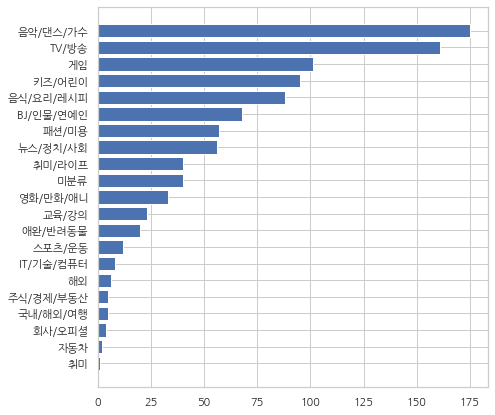

In [ ]:
# matplotlib의 pyplot을 사용하여 channel에 대한 bar 그래프
plt.figure(figsize=(7, 7))
plt.barh(channel.index, channel['category'])
plt.grid(True)
plt.show()

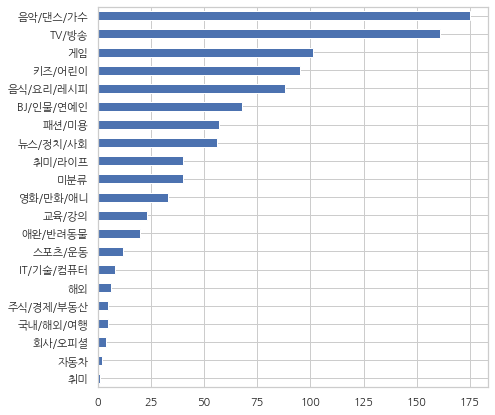

In [ ]:
# Series의 plot을 사용하여 channel에 대한 bar 그래프를 그립니다
channel['category'].plot(kind='barh', figsize=(7, 7), grid=True)
plt.show()

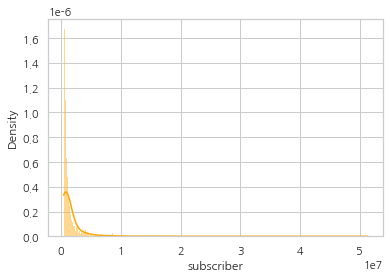

In [ ]:
# [1-59] Seaborn의 histplot으로 'subscriber'의 분포를 히스토그램으로 그립니다
sns.histplot(data=df, x='subscriber', color='orange', kde=True,
             stat='density', alpha=0.5)
plt.show()

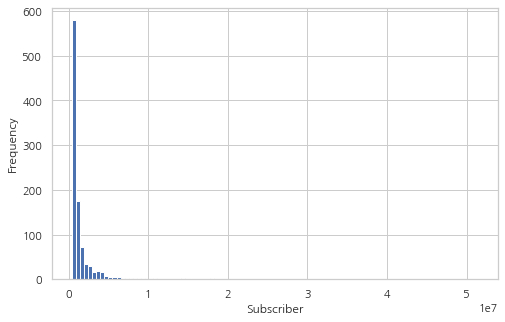

In [ ]:
# [1-60] DataFrame의 plot으로 'subscriber'의 분포를 히스토그램으로 그립니다

# df.plot(kind='hist', y='subscriber', bins=100, figsize=(8, 5),
#         legend=False, xlabel='subscriber', colormap='viridis')
df['subscriber'].plot(kind='hist', bins=100, figsize=(8, 5))
plt.xlabel('Subscriber')
plt.show()

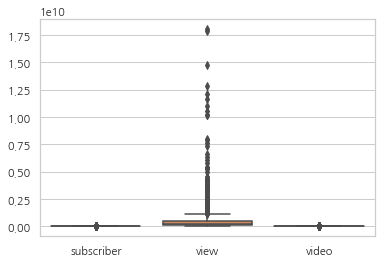

In [ ]:
# [1-61] Seaborn의 boxplot으로
# 'subscriber', 'view', 'video'의 분포를 박스 플롯으로 그립니다
plt.figure(figsize=(6, 4))
sns.boxplot(data=df)
plt.show()

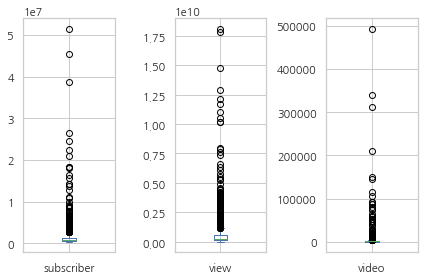

In [ ]:
# [1-62] matplotlib의 pyplot으로
# 'subscriber', 'view', 'video'의 분포를 박스 플롯으로 그립니다

# plt.subplot(1, 3, 1)
# df['subscriber'].plot(kind='box')
# plt.subplot(1, 3, 2)
# df['view'].plot(kind='box')
# plt.subplot(1, 3, 3)
# df['video'].plot(kind='box')
for i, x in enumerate(['subscriber', 'view', 'video'], start=1):
    plt.subplot(1, 3, i)
    df[x].plot(kind='box')
plt.tight_layout()
plt.show()

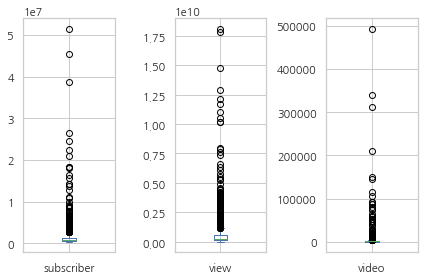

In [ ]:
# [1-63] DataFrame의 plot으로
# 'subscriber', 'view', 'video'의 분포를 박스 플롯으로 그립니다
df.plot(kind='box', subplots=True, figsize=(6, 4))
plt.tight_layout()
plt.show()

In [ ]:
# 고생하셨습니다!